# imports

In [1]:
# If Colab is missing networkx (usually it's present), uncomment:
# !pip install networkx

import re, itertools, math
from collections import defaultdict, Counter

import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

# english passage

In [2]:
raw_text = """
Janamejaya said:
Thus, the Pārthas, defeated in the dice game and angered by the wicked Dhārtarāṣṭras and their ministers, O best of Brahmins,
were subjected to harsh words, creating great animosity. What did my Kuru ancestors do?
How did the Pārthas, suddenly deprived of their sovereignty and overcome by sorrow, these heroes with splendor like Indra, live in the forest?
Who followed them, who had fallen into such deep distress? What was the food and conduct of those great souls, and where was their dwelling?
O best of Brahmins, how did twelve years pass in the forest for those great-souled heroes, the destroyers of enemies?
And how did that princess, foremost among all women, a devoted and highly fortunate wife, always truthful, endure the dreadful forest dwelling, though she was not meant for such hardship?
O ascetic rich in austerities, please tell me all this in detail.
I wish to hear the account of those endowed with great wealth and power.
As you narrate, O Brahmin, my curiosity is greatly piqued.
Vaiśampāyana said:
Thus, defeated in the dice game and angered by the wicked Dhārtarāṣṭras and their ministers, the Pārthas departed from Hāstinapura.They then emerged through the gate of the city known as Vardhamāna.
With weapons in hand and accompanied by Kṛṣṇā, they headed north.
Indrasena and the other fourteen servants, taking all their wives with them, followed in swift chariots.
O Bhārata, those tigers among men then ascended their chariots.
They saw a great banyan tree, named Pramāṇa, on the bank of the Jāhnavī.
Upon learning that they were departing, the citizens were overwhelmed with grief.
Having assembled together, they fearlessly censured Bhīṣma, Vidura, Droṇa, and Gautama repeatedly, speaking to each other:
"This entire lineage is not secure, neither are we, nor are our homes.
For where the wicked Duryodhana, aided by Saubala, Karṇa, and Duḥśāsana, covets this kingdom,
If this is so, there is no family, no good conduct, no dharma, no material gain (artha), and from where would there be happiness?
Where this wicked man, supported by other wicked individuals, desires to rule the kingdom,
Duryodhana, who despises his elders, has abandoned proper conduct and his well-wishers.
He is greedy for wealth, arrogant, mean, and cruel by nature.
This entire earth cannot remain [healthy] where Duryodhana is king.
"It is good! Let us all go where the Pāṇḍavas are going.
They are compassionate, great-souled, and have conquered their senses and enemies.
They are modest, renowned, and devoted to righteous conduct.Having spoken thus, they all together followed the Pāṇḍavas.
All of them, with joined hands, spoke to the sons of Kuntī and Mādrī:
"O fortunate ones, where will you go, leaving us who share in your grief?"
"We will also follow you wherever you go."
Having heard that you were defeated unjustly by enemies devoid of pity,
all of us are greatly distressed. You should not abandon us here.
"We are your devoted friends, always intent on your well-being."
"We do not wish to be completely destroyed by living in a kingdom ruled by an evil king."
"O best of men, listen, and we will tell you about the merits and demerits."
"[We will explain] how associating with those who possess good and evil qualities leads [to particular consequences]."
Just as fragrance pervades cloth, water, sesame seeds, and the ground,
so too are qualities born of association, as with the fragrance of flowers.
Association with fools is indeed the source of a net of delusion.
Day after day, association with the righteous is the source of dharma.
Therefore, those who are devoted to equanimity should associate with the wise, the elderly, those of good nature, the austere, and the righteous.
One should serve those whose lineage, learning, and actions are pure in three ways. The wisdom gained by associating with them is indeed superior even to that gained from the scriptures.
Without even performing rites, we obtain merit here by associating with the righteous and meritorious, just as one obtains demerit by serving the wicked.By seeing, touching, conversing with, and sitting with the wicked, righteous conduct declines, and people do not achieve success. The intellect of men also diminishes through association with the base. One attains mediocrity by associating with mediocre people, and excellence by associating with the best, especially not with the lowly, the inappropriate, or the unrighteous.
The qualities praised in the world, which give rise to Dharma, wealth, and pleasure, are born from worldly conduct, are mentioned in the Vedas, and are approved by the noble. These good qualities are present in you, both collectively and individually. Desiring what is beneficial, we wish to live among the virtuous.
Yudhiṣṭhira said: We are fortunate that our subjects, led by the brāhmaṇas, motivated by affection and compassion, attribute good qualities to us, even though we may not possess them. Therefore, I, along with my brothers, request all of you: do not act otherwise, for the sake of our affection and compassion.
My grandfather Bhīṣma, the king, Vidura, my mother, and most of my well-wishers are in the city called Nāgasāhvaya. If you desire our well-being, you must diligently protect them, as they are overwhelmed with grief and sorrow. You, who have come from afar, return now, having been sworn to friendship. Let your minds be filled with affection for my kinsmen, whom I leave in your care.This is indeed the most important of my duties, firmly set in my heart.
Through this virtuous act, I shall attain contentment and honor.
Vaiśaṃpāyana said:
Thus advised by Dharmarāja, those subjects,
distressed, made a terrible, mournful sound, crying, "Alas, O King!"
Remembering Pārtha's good qualities, they, greatly afflicted by sorrow and unwilling, returned after meeting the Pāṇḍavas.
When the citizens had returned, the Pāṇḍavas mounted their chariots.
They proceeded to a large banyan tree named Pramāṇa on the banks of the Jahnavī.
The Pāṇḍavas, at the close of that day, reached that banyan tree.
The brave warriors, having touched the pure water, spent that night there.
Afflicted by grief, they spent that night subsisting only on water.
Out of affection, some twice-born followed them there.
Some maintained their sacred fires, while others did not, and they were accompanied by their disciples, relatives, and kin.
That king, surrounded by those who spoke about Brahman, shone brightly.
At a moment that was both beautiful and terrible, after their fires had been kindled, and with the chanting of sacred texts as their forefront, conversations arose.
Those foremost among the brahmins, whose voices were as sweet as swans, spent the entire night consoling the king, the best of the Kurus.
The king, along with his brothers and all his friends,That night, the king lay down, overcome with sorrow and grief.


"""

def normalize_space(s):
    import re
    return re.sub(r'\s+', ' ', s).strip()

def split_sentences(text):
    import re
    text = text.replace('\n', ' ').replace('."', '".')
    sents = re.split(r'(?<=[\.\?\!])\s+(?=[A-Z“"])', text)
    return [normalize_space(s) for s in sents if normalize_space(s)]

speaker_markers = [
    ("Janamejaya", r"Janamejaya said:"),
    ("Vaiśampāyana", r"Vaiśampāyana said:"),
    ("Yudhiṣṭhira", r"Yudhiṣṭhira said:"),
    ("Vaiśaṃpāyana", r"Vaiśaṃpāyana said:"),  # alias spelling
]

# Find speaker blocks
parts = []
for spk, marker in speaker_markers:
    for m in re.finditer(re.escape(marker), raw_text):
        parts.append((m.start(), spk))
parts.sort()

segments = []
for i,(pos, spk) in enumerate(parts):
    start = pos + len([m for name,m in speaker_markers if name==spk][0])
    end = parts[i+1][0] if i+1 < len(parts) else len(raw_text)
    segments.append((spk, raw_text[start:end]))

# Canonicalize narrator spelling
canon_segments = []
for spk, seg in segments:
    canon_segments.append(("Vaiśampāyana" if spk in ("Vaiśampāyana","Vaiśaṃpāyana") else spk, seg))

def extract_quotes(text):
    import re
    return re.findall(r'"(.*?)"', text)

# Split out citizens’ quotes from the narrator
split_segments = []
for spk, seg in canon_segments:
    quotes = extract_quotes(seg)
    if quotes and spk=="Vaiśampāyana":
        seg_no_quotes = re.sub(r'"(.*?)"', '', seg)
        split_segments.append((spk, seg_no_quotes))
        for q in quotes:
            split_segments.append(("Citizens", q))
    else:
        split_segments.append((spk, seg))

english character& place detection

In [3]:
# Character/alias map
CHAR_ALIASES = {
    "Pāṇḍavas": {"Pāṇḍavas","Pārthas","Pārtha","Pārtha's","sons of Kuntī","sons of Mādrī","sons of Kuntī and Mādrī"},
    "Duryodhana": {"Duryodhana"},
    "Karṇa": {"Karṇa"},
    "Duḥśāsana": {"Duḥśāsana"},
    "Saubala": {"Saubala"},
    "Bhīṣma": {"Bhīṣma"},
    "Vidura": {"Vidura"},
    "Droṇa": {"Droṇa"},
    "Gautama": {"Gautama"},
    "Kṛṣṇā": {"Kṛṣṇā"},
    "Indrasena": {"Indrasena"},
    "Citizens": {"citizens","subjects"},
    "Yudhiṣṭhira": {"Yudhiṣṭhira","Dharmarāja"},
    "Janamejaya": {"Janamejaya"},
    "Brahmins": {"brāhmaṇas","brahmins","twice-born"},
    "King (generic)": {"king","King"},
}

PLACES = {
    "Hāstinapura": {"Hāstinapura"},
    "Vardhamāna Gate": {"Vardhamāna"},
    "Jāhnavī (Gaṅgā)": {"Jāhnavī","Jahnavī"},
    "Pramāṇa Banyan": {"Pramāṇa"},
    "Nāgasāhvaya": {"Nāgasāhvaya"},
}

POS_WORDS = set("""
righteous dharma virtue virtuous good noble modest renowned compassion affectionate affection
conquered pure purest wisdom well-being beneficial contentment honor fortunate fortunate-ones
""".split())

NEG_WORDS = set("""
wicked evil cruel greedy arrogant mean harsh sorrow grief distressed mournful lament
""".split())

ETHICAL_WORDS = set("""
dharma conduct righteous wicked merit demerit affection compassion duty honor virtue virtues
equanimity austere wise learning lineage righteous-conduct proper-conduct
""".split())

def sentiment_score(text):
    import re
    tokens = re.findall(r"[A-Za-zÀ-ž\-']+", text.lower())
    pos = sum(1 for t in tokens if t in POS_WORDS)
    neg = sum(1 for t in tokens if t in NEG_WORDS)
    return pos - neg, pos, neg

# Build sentence records
sent_records = []
for spk, seg in split_segments:
    sents = split_sentences(seg)
    for s in sents:
        chars, places = set(), set()
        for canon, variants in CHAR_ALIASES.items():
            if any(re.search(r'\b'+re.escape(v)+r'\b', s) for v in variants):
                chars.add(canon)
        for canon, variants in PLACES.items():
            if any(re.search(r'\b'+re.escape(v)+r'\b', s) for v in variants):
                places.add(canon)
        sc, pcount, ncount = sentiment_score(s)
        sent_records.append({
            "speaker": spk,
            "sentence": s,
            "characters": sorted(chars),
            "places": sorted(places),
            "sentiment": sc,
            "pos": pcount,
            "neg": ncount
        })

df_sent = pd.DataFrame(sent_records)
df_sent.head()

,speaker,sentence,characters,places,sentiment,pos,neg
0,Janamejaya,"Thus, the Pārthas, defeated in the dice game a...",[Pāṇḍavas],[],-2,0,2
1,Janamejaya,What did my Kuru ancestors do?,[],[],0,0,0
2,Janamejaya,"How did the Pārthas, suddenly deprived of thei...",[Pāṇḍavas],[],-1,0,1
3,Janamejaya,"Who followed them, who had fallen into such de...",[],[],0,0,0
4,Janamejaya,What was the food and conduct of those great s...,[],[],0,0,0


english co-occurence network

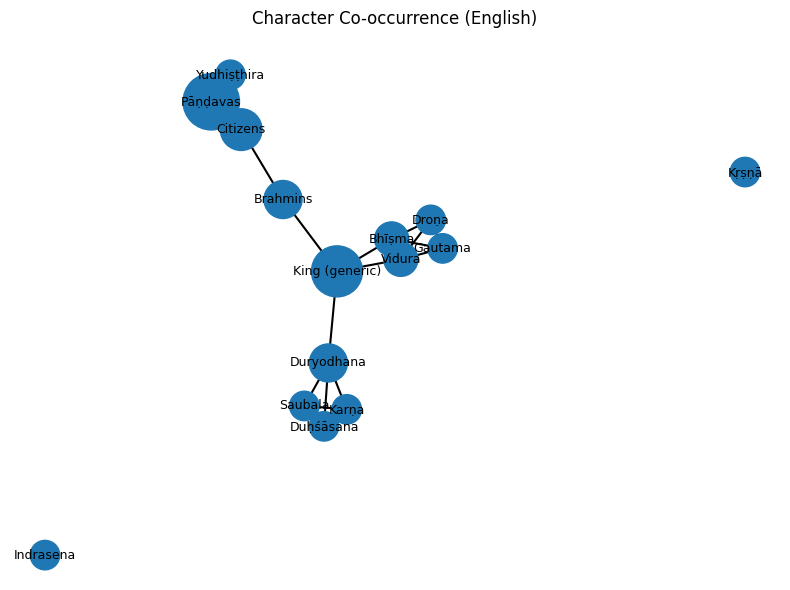

In [4]:
G = nx.Graph()
char_counts = Counter()
for r in sent_records:
    for c in r["characters"]:
        char_counts[c] += 1
        if c not in G: G.add_node(c, count=0)
        G.nodes[c]["count"] = char_counts[c]

# Weighted edges
for r in sent_records:
    chars = r["characters"]
    if len(chars) >= 2:
        for a,b in itertools.combinations(sorted(chars), 2):
            G.add_edge(a,b, weight=G.get_edge_data(a,b,default={"weight":0})["weight"] + 1)

# Edge table → CSV
edges_df = pd.DataFrame(
    [{"char_u":u,"char_v":v,"weight":int(d.get("weight",0))} for u,v,d in G.edges(data=True)]
).sort_values(["weight","char_u","char_v"], ascending=[False,True,True])
edges_df.to_csv("character_edges.csv", index=False)

# Plot
plt.figure(figsize=(8,6))
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=[300+150*char_counts[n] for n in G.nodes()])
nx.draw_networkx_edges(G, pos, width=[1+0.5*d["weight"] for _,_,d in G.edges(data=True)])
nx.draw_networkx_labels(G, pos, font_size=9)
plt.title("Character Co-occurrence (English)")
plt.axis('off'); plt.tight_layout()
plt.savefig("character_network.png", dpi=200)
plt.show()

speaker metrics - sentiment + ethical density

,words,ethical_terms,sentiment,pos,neg,ethical_per_100w
speaker,,,,,,
Yudhiṣṭhira,141,6,9,11,2,4.26
Vaiśampāyana,733,29,5,23,18,3.96
Janamejaya,170,2,-2,1,3,1.18
Citizens,85,0,0,3,3,0.00


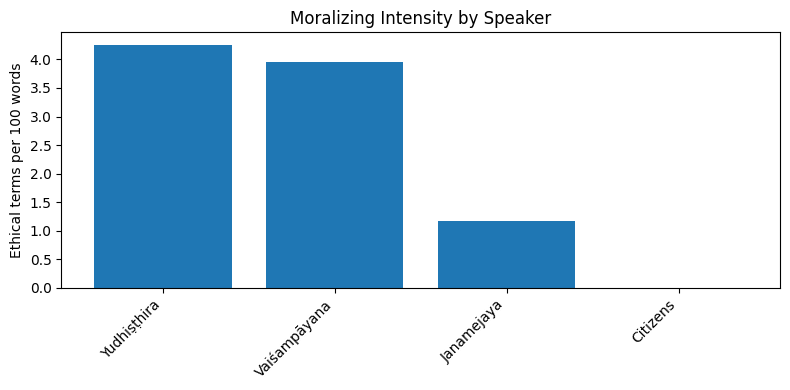

In [5]:
def word_count(s):
    import re
    return len(re.findall(r"[A-Za-zÀ-ž\-']+", s))

speaker_sent = df_sent.groupby("speaker")[["sentiment","pos","neg"]].sum()
speaker_word_counts = df_sent.groupby("speaker")["sentence"].apply(lambda x: sum(word_count(s) for s in x))
ethical_counts = df_sent.groupby("speaker")["sentence"].apply(
    lambda sers: sum(1 for s in sers for t in re.findall(r"[A-Za-zÀ-ž\-']+", s.lower()) if t in ETHICAL_WORDS)
)

metrics = pd.DataFrame({
    "words": speaker_word_counts,
    "ethical_terms": ethical_counts,
}).join(speaker_sent)
metrics["ethical_per_100w"] = (metrics["ethical_terms"]/metrics["words"]*100).round(2)
metrics.to_csv("speaker_metrics.csv", index=False)
display(metrics.sort_values("ethical_per_100w", ascending=False))

# Plot
plt.figure(figsize=(8,4))
mplot = metrics.sort_values("ethical_per_100w", ascending=False)
plt.bar(range(len(mplot)), mplot["ethical_per_100w"].values)
plt.xticks(range(len(mplot)), mplot.index.tolist(), rotation=45, ha='right')
plt.ylabel("Ethical terms per 100 words")
plt.title("Moralizing Intensity by Speaker")
plt.tight_layout()
plt.savefig("ethical_ratio_by_speaker.png", dpi=200)
plt.show()

timeline card (non-quantitaive, i.e. manually input the locations just to visually present)

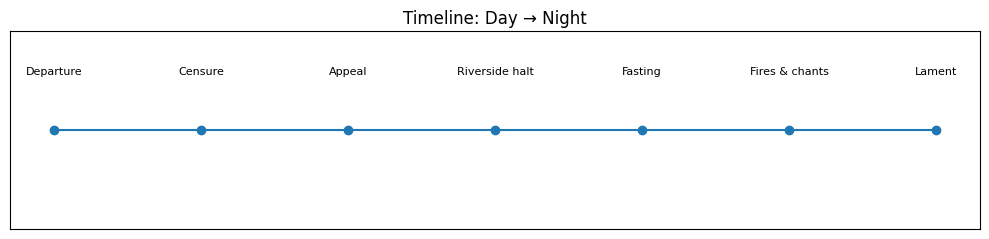

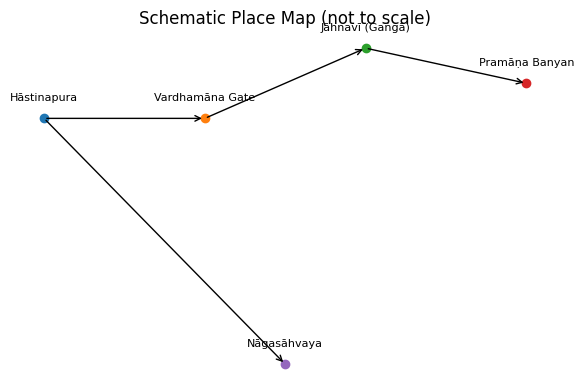

In [6]:
# Timeline
timeline_events = [
    ("Departure", "day"),
    ("Censure", "day"),
    ("Appeal", "evening"),
    ("Riverside halt", "evening"),
    ("Fasting", "night"),
    ("Fires & chants", "night"),
    ("Lament", "night"),
]
plt.figure(figsize=(10,2.5))
xs = list(range(len(timeline_events)))
ys = [1]*len(xs)
plt.plot(xs, ys, marker='o')
for i,(title,phase) in enumerate(timeline_events):
    plt.text(xs[i], ys[i]+0.03, title, ha='center', va='bottom', fontsize=8)
plt.yticks([]); plt.xticks([])
plt.title("Timeline: Day → Night")
plt.tight_layout()
plt.savefig("timeline_card.png", dpi=200)
plt.show()

# Place map (schematic)
place_order = ["Hāstinapura", "Vardhamāna Gate", "Jāhnavī (Gaṅgā)", "Pramāṇa Banyan", "Nāgasāhvaya"]
coords = {
    "Hāstinapura": (0, 0.5),
    "Vardhamāna Gate": (1, 0.5),
    "Jāhnavī (Gaṅgā)": (2, 0.7),
    "Pramāṇa Banyan": (3, 0.6),
    "Nāgasāhvaya": (1.5, -0.2),
}
plt.figure(figsize=(6,4))
for p in place_order:
    x,y = coords[p]
    plt.scatter([x],[y])
    plt.text(x, y+0.05, p, ha='center', fontsize=8)
for a,b in zip(place_order[:-2], place_order[1:-1]):
    x1,y1 = coords[a]; x2,y2 = coords[b]
    plt.annotate("", xy=(x2,y2), xytext=(x1,y1), arrowprops=dict(arrowstyle="->"))
plt.annotate("", xy=coords["Nāgasāhvaya"], xytext=coords["Hāstinapura"], arrowprops=dict(arrowstyle="->"))
plt.title("Schematic Place Map (not to scale)")
plt.axis('off'); plt.tight_layout()
plt.savefig("place_map.png", dpi=200)
plt.show()

loading csv file of original sanskrit analysis

In [7]:
# Point this to your uploaded file in Colab:
BYT5_CSV = "/content/fact_tokens_expanded.csv"  # <--- change if needed
df = pd.read_csv(BYT5_CSV)
print("Shape:", df.shape)
display(df.head(20))
print(list(df.columns))

Shape: (678, 6)


,id,L,S,M_surface,M_tags,morph_expand
0,1,janamejaya,janamejayaḥ,janamejaya,SNM,Case = Nominative; Gender = Masculine; Number ...
1,2,vac,uvāca,vac,SPs3In,Mood = Indicative; Number = Singular; Person =...
2,3,evam,evam,evam,NaN,Note: Probably indeclinable
3,4,dyūta,dyūta,dyūta,Cp,Compound
4,5,ji,jitāḥ,ji,PNPaM,Case = Nominative; Gender = Masculine; Number ...
5,6,pārtha,pārthāḥ,pārtha,PNM,Case = Nominative; Gender = Masculine; Number ...
6,7,kopay,kopitāḥ,kopay,PNPaM,Case = Nominative; Gender = Masculine; Number ...
7,8,ca,ca,ca,NaN,Note: Probably indeclinable
8,9,durātman,durātmabhiḥ,durātman,PIM,Case = Instrumental; Gender = Masculine; Numbe...
9,10,dhārtarāṣṭra,dhārtarāṣṭraiḥ,dhārtarāṣṭra,PIM,Case = Instrumental; Gender = Masculine; Numbe...


['id', 'L', 'S', 'M_surface', 'M_tags', 'morph_expand']


parse morpho + map canocial names and enrich

In [8]:
import re

def extract_feature(s, key):
    if pd.isna(s): return None
    m = re.search(rf"{key}\s*=\s*([A-Za-z]+)", s)
    return m.group(1) if m else None

for k in ["Case","Number","Gender","Person","Tense","Mood","Voice","VerbForm"]:
    df[k.lower()] = df["morph_expand"].apply(lambda x: extract_feature(x, k))

df["is_compound"] = df["morph_expand"].fillna("").str.contains("Compound", case=False)
df["lemma"] = df["L"].astype(str).str.strip().str.lower()
df["surface"] = df["S"].astype(str).str.strip().str.lower()

name_variants = {
    "pāṇḍava": {"pāṇḍava","pārtha","pārthā","pārthāḥ","pārth"},
    "duryodhana": {"duryodhana"},
    "karṇa": {"karṇa"},
    "duḥśāsana": {"duḥśāsana"},
    "saubala": {"saubala"},
    "bhīṣma": {"bhīṣma"},
    "vidura": {"vidura"},
    "droṇa": {"droṇa"},
    "gautama": {"gautama"},
    "kṛṣṇā": {"kṛṣṇā"},
    "indrasena": {"indrasena"},
    "janamejaya": {"janamejaya"},
    "yudhiṣṭhira": {"yudhiṣṭhira","dharmarāja","dharmarājaḥ"},
    "brāhmaṇa": {"brāhmaṇa","brahmin","brāhmaṇas","dvija"},
    "hāstinapura": {"hāstinapura"},
    "vardhamāna": {"vardhamāna"},
    "jāhnavī": {"jāhnavī","jahnavī"},
    "pramāṇa": {"pramāṇa"},
    "nāgasāhvaya": {"nāgasāhvaya"},
}
variant_to_name = {v:canon for canon,vs in name_variants.items() for v in vs}

def map_name(lemma):
    if not isinstance(lemma, str): return None
    if lemma in variant_to_name: return variant_to_name[lemma]
    for v,canon in variant_to_name.items():
        if lemma.startswith(v): return canon
    return None

df["name_canon"] = df["lemma"].apply(map_name)

persons = {"pāṇḍava","duryodhana","karṇa","duḥśāsana","saubala","bhīṣma","vidura","droṇa","gautama","kṛṣṇā","indrasena","janamejaya","yudhiṣṭhira","brāhmaṇa"}
places = {"hāstinapura","vardhamāna","jāhnavī","pramāṇa","nāgasāhvaya"}
def ent_type(canon):
    if canon in persons: return "PERSON"
    if canon in places: return "PLACE"
    return None
df["ent_type"] = df["name_canon"].apply(ent_type)

enriched_cols = ["id","surface","lemma","case","number","gender","tense","mood","voice","verbform","name_canon","ent_type","is_compound"]
df[enriched_cols].to_csv("fact_tokens_enriched.csv", index=False)
display(df[enriched_cols].head(10))

,id,surface,lemma,case,number,gender,tense,mood,voice,verbform,name_canon,ent_type,is_compound
0,1,janamejayaḥ,janamejaya,Nominative,Singular,Masculine,None,None,None,None,janamejaya,PERSON,False
1,2,uvāca,vac,None,Singular,None,Past,Indicative,None,None,None,None,False
2,3,evam,evam,None,None,None,None,None,None,None,None,None,False
3,4,dyūta,dyūta,None,None,None,None,None,None,None,None,None,True
4,5,jitāḥ,ji,Nominative,Plural,Masculine,None,None,None,Part,None,None,False
5,6,pārthāḥ,pārtha,Nominative,Plural,Masculine,None,None,None,None,pāṇḍava,PERSON,False
6,7,kopitāḥ,kopay,Nominative,Plural,Masculine,None,None,None,Part,None,None,False
7,8,ca,ca,None,None,None,None,None,None,None,None,None,False
8,9,durātmabhiḥ,durātman,Instrumental,Plural,Masculine,None,None,None,None,None,None,False
9,10,dhārtarāṣṭraiḥ,dhārtarāṣṭra,Instrumental,Plural,Masculine,None,None,None,None,None,None,False


agency (case) table per name

In [9]:
persons_df = df[(df["name_canon"].notna()) & (df["ent_type"]=="PERSON")]
case_table = (
    persons_df.groupby(["name_canon","case"])["id"].count().reset_index()
    .pivot_table(index="name_canon", columns="case", values="id", fill_value=0)
    .reset_index()
)
for c in ["Nominative","Accusative","Instrumental","Dative","Genitive","Locative","Ablative","Vocative"]:
    if c not in case_table.columns:
        case_table[c] = 0
case_table["total_tokens"] = case_table.drop(columns=["name_canon"]).sum(axis=1)
case_table["nominative_share"] = (case_table["Nominative"]/case_table["total_tokens"]).fillna(0).round(3)
display(case_table.sort_values(["nominative_share","total_tokens"], ascending=[False,False]))

case,name_canon,Accusative,Genitive,Instrumental,Nominative,Vocative,Dative,Locative,Ablative,total_tokens,nominative_share
2,duryodhana,0.0,0.0,0.0,3.0,0.0,0,0,0,3.0,1.000
0,bhīṣma,0.0,0.0,0.0,1.0,0.0,0,0,0,1.0,1.000
5,janamejaya,0.0,0.0,0.0,1.0,0.0,0,0,0,1.0,1.000
8,vidura,0.0,0.0,0.0,1.0,0.0,0,0,0,1.0,1.000
7,pāṇḍava,2.0,1.0,0.0,6.0,0.0,0,0,0,9.0,0.667
9,yudhiṣṭhira,0.0,0.0,1.0,1.0,0.0,0,0,0,2.0,0.500
1,brāhmaṇa,0.0,0.0,0.0,0.0,1.0,0,0,0,1.0,0.000
3,duḥśāsana,0.0,0.0,1.0,0.0,0.0,0,0,0,1.0,0.000
4,gautama,1.0,0.0,0.0,0.0,0.0,0,0,0,1.0,0.000
6,kṛṣṇā,0.0,0.0,1.0,0.0,0.0,0,0,0,1.0,0.000


ByT5 directed interaction network (nominative --> nearby entities)

,src,dst,weight
20,pāṇḍava,pramāṇa,2
19,pāṇḍava,jāhnavī,2
2,pāṇḍava,janamejaya,1
1,janamejaya,brāhmaṇa,1
0,janamejaya,pāṇḍava,1
4,pāṇḍava,vardhamāna,1
3,pāṇḍava,brāhmaṇa,1
5,pāṇḍava,kṛṣṇā,1
6,duryodhana,vidura,1
9,duryodhana,karṇa,1


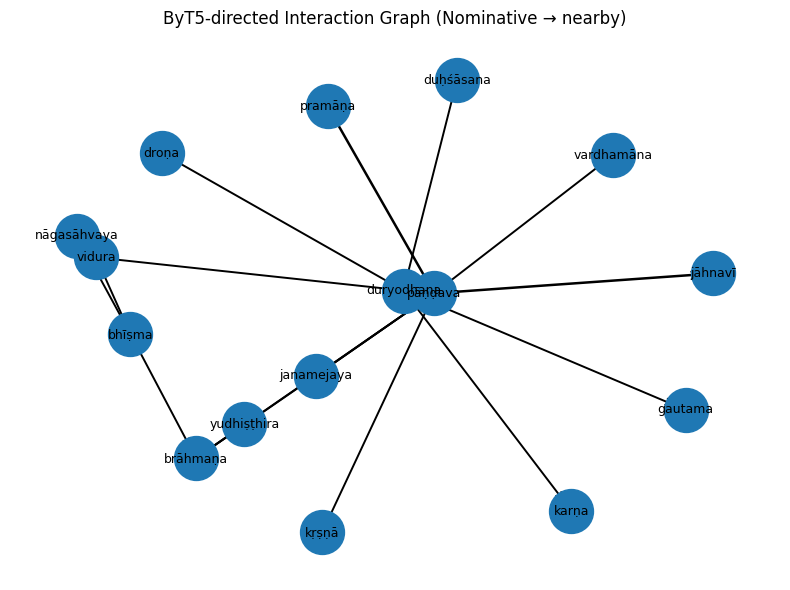

In [10]:
window = 20
tok = df[df["name_canon"].notna()].copy()
tok["id"] = pd.to_numeric(tok["id"], errors="coerce")
tok = tok.sort_values("id")

edges = Counter()
actors = tok[(tok["case"]=="Nominative") & (tok["ent_type"]=="PERSON")]
for _, row in actors.iterrows():
    src = row["name_canon"]; src_id = row["id"]
    local = tok[(tok["id"] >= src_id - window) & (tok["id"] <= src_id + window)]
    for _, other in local.iterrows():
        if other["name_canon"] and other["name_canon"] != src:
            edges[(src, other["name_canon"])] += 1

byT5_edges = pd.DataFrame(
    [{"src":s,"dst":d,"weight":w} for (s,d),w in edges.items()]
).sort_values("weight", ascending=False)
byT5_edges.to_csv("byT5_directed_edges.csv", index=False)
display(byT5_edges.head(20))

# Plot
Gdir = nx.DiGraph()
for _, r in byT5_edges.head(20).iterrows():  # top-20 for readability
    Gdir.add_edge(r["src"], r["dst"], weight=r["weight"])

plt.figure(figsize=(8,6))
pos = nx.spring_layout(Gdir, seed=7)
nx.draw_networkx_nodes(Gdir, pos, node_size=1000)
nx.draw_networkx_labels(Gdir, pos, font_size=9)
nx.draw_networkx_edges(Gdir, pos, width=[1+0.4*d["weight"] for _,_,d in Gdir.edges(data=True)],
                       arrows=True, arrowstyle="->", arrowsize=12)
plt.title("ByT5-directed Interaction Graph (Nominative → nearby)")
plt.axis('off'); plt.tight_layout()
plt.savefig("byT5_directed_network.png", dpi=200)
plt.show()

the above uses a +- 20 token window around each nominative PERSON to create directed edges; plots a simple directed graph; writes edges to CSV

ethical lemmas (sanskrit) + compound spotlight


> counts core ethical lemmas in sanskrit; previews compound tokens (the ethical lemmas are common ethical samskrta terms)



In [11]:
ethics_lemmas = {
    "dharma","artha","kāma","sukha","duḥkha","puṇya","pāpa","sādhu","duṣṭa","śīla","guṇa","doṣa",
    "satya","anṛta","hitam","śreyas","maṅgala","nīti","dāna","tapas","śruta","śaucam","dayā","kṣamā",
    "krodha","lobha","moha","ahiṃsā","sat","asat","śraddhā","vrata"
}
eth_counts = (
    df[df["lemma"].isin(ethics_lemmas)]
    .groupby("lemma")["id"].count()
    .reset_index().rename(columns={"id":"count"})
    .sort_values("count", ascending=False)
)
display(eth_counts)

compounds = df[df["is_compound"]][["id","surface","lemma","morph_expand"]].head(25)
display(compounds)

,lemma,count
5,guṇa,6
2,dharma,5
4,duḥkha,5
9,pāpa,5
0,artha,4
13,sādhu,3
6,kāma,2
1,asat,2
10,sat,2
8,puṇya,2


,id,surface,lemma,morph_expand
3,4,dyūta,dyūta,Compound
24,25,pūrva,pūrva,Compound
28,29,aiśvarya,aiśvarya,Compound
36,37,śakra,śakra,Compound
37,38,pratima,pratima,Compound
59,60,brāhmaṇa,brāhmaṇa,Compound
62,63,ari,ari,Compound
66,67,rāja,rājan,Compound
70,71,sarva,sarva,Compound
75,76,satya,satya,Compound


combined overlay - english co-occurence + ByT5 role-colored directions


> Reads character_edges.csv (from Step 3) and fact_tokens_enriched.csv (from Step 7), then overlays Accusative / Instrumental / Locative arrows on top of the undirected English graph. Writes a high-res PNG/PDF and a by-role CSV



/tmp/ipython-input-364663447.py:64: UserWarning: 

The arrowstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(
/tmp/ipython-input-364663447.py:64: UserWarning: 

The arrowsize keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for large graphs.

  nx.draw_networkx_edges(
/tmp/ipython-input-364663447.py:64: UserWarning: 

The connectionstyle keyword argument is not applicable when drawing edges
with LineCollection.

To make this warning go away, either specify `arrows=True` to
force FancyArrowPatches or use the default values.
Note that using FancyArrowPatches may be slow for

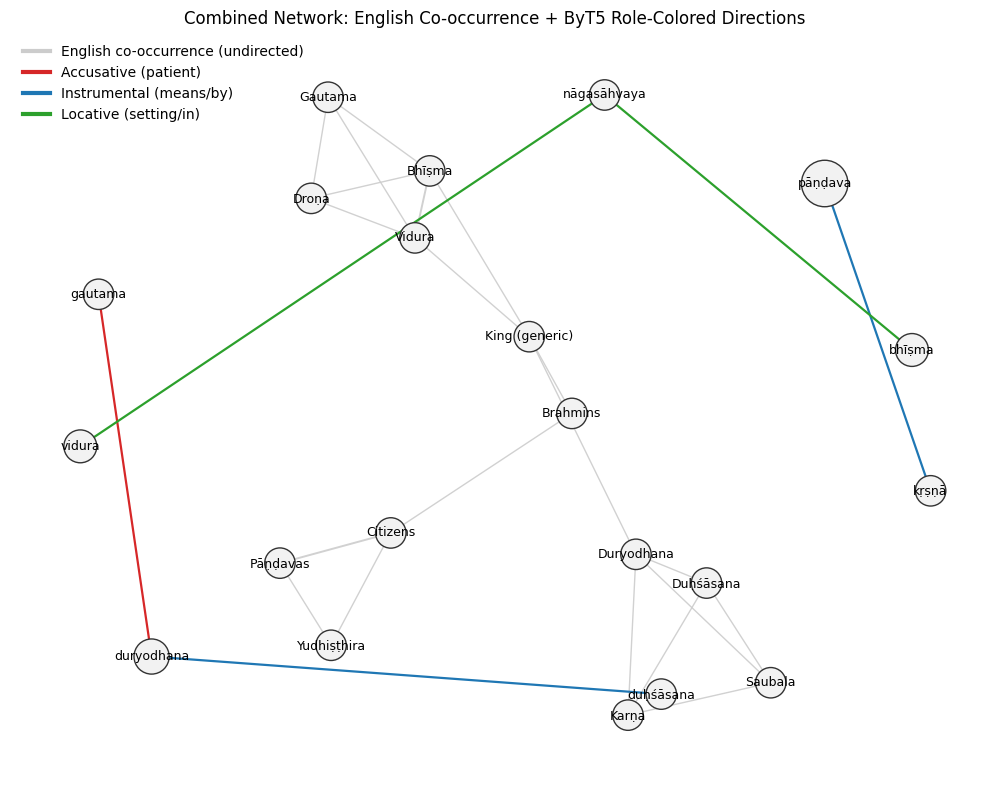

,src,dst,role,weight
0,pāṇḍava,kṛṣṇā,Instrumental,1
1,duryodhana,gautama,Accusative,1
2,duryodhana,duḥśāsana,Instrumental,1
3,bhīṣma,nāgasāhvaya,Locative,1
4,vidura,nāgasāhvaya,Locative,1


In [12]:
# Load artifacts
coocc = pd.read_csv("character_edges.csv")
enriched = pd.read_csv("fact_tokens_enriched.csv")

# Base undirected graph (English)
G_base = nx.Graph()
for _, r in coocc.iterrows():
    if int(r["weight"]) > 0:
        G_base.add_edge(r["char_u"], r["char_v"], weight=int(r["weight"]))

# Directed ByT5 edges with role labels
window = 20
tok = enriched.dropna(subset=["name_canon"]).copy()
tok["id"] = pd.to_numeric(tok["id"], errors="coerce")
tok = tok.sort_values("id")

edges_role = Counter()
node_counts = Counter(tok["name_canon"].value_counts().to_dict())

actors = tok[(tok["case"]=="Nominative") & (tok["ent_type"]=="PERSON")]
for _, row in actors.iterrows():
    src = row["name_canon"]; src_id = row["id"]
    local = tok[(tok["id"] >= src_id - window) & (tok["id"] <= src_id + window)]
    for _, other in local.iterrows():
        if other["name_canon"] == src: continue
        role = other["case"] if isinstance(other["case"], str) else "Other"
        if role in ["Accusative","Instrumental","Locative"]:
            edges_role[(src, other["name_canon"], role)] += 1

byrole = pd.DataFrame([{"src":s,"dst":d,"role":r,"weight":w} for (s,d,r),w in edges_role.items()]) \
            .sort_values("weight", ascending=False)
byrole.to_csv("byT5_directed_edges_by_role.csv", index=False)

# Ensure nodes union across both sources
all_nodes = set(G_base.nodes()) | set(byrole["src"].unique()) | set(byrole["dst"].unique())
for n in all_nodes:
    if n not in G_base: G_base.add_node(n)

pos = nx.spring_layout(G_base, seed=23, k=0.8)

plt.figure(figsize=(10,8))
# Background co-occurrence edges
nx.draw_networkx_edges(G_base, pos,
    width=[0.6+0.4*G_base[u][v]["weight"] for u,v in G_base.edges()],
    edge_color="#cccccc", alpha=0.9
)
# Nodes (size ~ ByT5 token freq)
nx.draw_networkx_nodes(G_base, pos, node_size=[400+80*node_counts.get(n,1) for n in G_base.nodes()],
                       node_color="#f2f2f2", edgecolors="#333333", linewidths=1.0)
nx.draw_networkx_labels(G_base, pos, font_size=9)

role_specs = {
    "Accusative": {"color": "#d62728", "rad": 0.25},
    "Instrumental": {"color": "#1f77b4", "rad": -0.15},
    "Locative": {"color": "#2ca02c", "rad": 0.05},
}
N_PER_ROLE = 15  # to keep the figure readable

for role, spec in role_specs.items():
    subset = byrole[byrole["role"] == role].head(N_PER_ROLE)
    for _, r in subset.iterrows():
        u, v, w = r["src"], r["dst"], r["weight"]
        if u in pos and v in pos:
            nx.draw_networkx_edges(
                G_base, pos, edgelist=[(u,v)],
                arrowstyle="->", arrowsize=14, width=1.0+0.6*w,
                edge_color=spec["color"],
                connectionstyle=f"arc3,rad={spec['rad']}"
            )

import matplotlib.lines as mlines
legend_handles = [
    mlines.Line2D([], [], color="#cccccc", linewidth=3, label="English co-occurrence (undirected)"),
    mlines.Line2D([], [], color=role_specs["Accusative"]["color"], linewidth=3, label="Accusative (patient)"),
    mlines.Line2D([], [], color=role_specs["Instrumental"]["color"], linewidth=3, label="Instrumental (means/by)"),
    mlines.Line2D([], [], color=role_specs["Locative"]["color"], linewidth=3, label="Locative (setting/in)"),
]
plt.legend(handles=legend_handles, loc="upper left", frameon=False)
plt.title("Combined Network: English Co-occurrence + ByT5 Role-Colored Directions")
plt.axis('off'); plt.tight_layout()
plt.savefig("combined_role_directed_network.png", dpi=300)
plt.savefig("combined_role_directed_network.pdf")
plt.show()

# Optional: top directed edges by role for your appendix
top_table = byrole.groupby("role").head(10).reset_index(drop=True)
display(top_table)